<a href="https://colab.research.google.com/github/pelindurmaz/pelindurmaz.github.io/blob/master/IVP_IR_Oxford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/sample_data
!mkdir Oxford

mkdir: cannot create directory ‘Oxford’: File exists


In [ ]:
!gdown --id 1e3QMZAHqkjFdxDd-e9UxQGMRLbsdyzuR

Downloading...
From: https://drive.google.com/uc?id=1e3QMZAHqkjFdxDd-e9UxQGMRLbsdyzuR
To: /content/oxbuild_images.tgz
100% 1.98G/1.98G [00:17<00:00, 111MB/s] 


In [ ]:
!tar -xf /content/oxbuild_images.tgz --directory /content/Oxford

In [ ]:
%tensorflow_version 1.x

In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from keras.applications.vgg19 import VGG19

Using TensorFlow backend.


In [ ]:
model = VGG19(weights='imagenet')
#model = keras.applications.ResNet50(weights='imagenet')
#model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [ ]:
#!nvidia-smi

In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


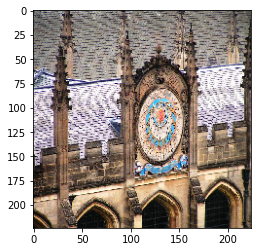

In [ ]:
img, x = load_image("/content/Oxford/all_souls_000070.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [ ]:
# forward the image through the network
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

predicted church with probability 0.454
predicted palace with probability 0.240
predicted monastery with probability 0.089
predicted altar with probability 0.067
predicted vault with probability 0.039


In [ ]:
#feature extractor for VGG
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
#feature extractor for ResNet50
#feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc1000").output)
feat_extractor.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

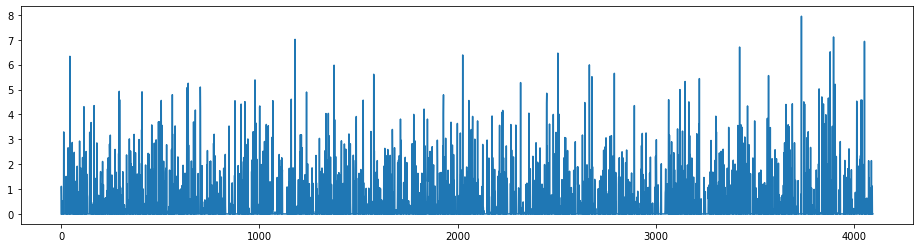

In [ ]:
img, x = load_image("/content/Oxford/christ_church_000261.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])


In [ ]:
images_path = '/content/Oxford'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 5063 images to analyze


In [ ]:
import time
tic = time.perf_counter()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.perf_counter()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.perf_counter()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 5063. Time: 0.0002 seconds.
analyzing image 500 / 5063. Time: 25.5316 seconds.
analyzing image 1000 / 5063. Time: 24.8479 seconds.
analyzing image 1500 / 5063. Time: 25.1343 seconds.
analyzing image 2000 / 5063. Time: 25.2800 seconds.
analyzing image 2500 / 5063. Time: 25.0479 seconds.
analyzing image 3000 / 5063. Time: 24.8981 seconds.
analyzing image 3500 / 5063. Time: 25.0807 seconds.
analyzing image 4000 / 5063. Time: 24.7544 seconds.
analyzing image 4500 / 5063. Time: 24.8807 seconds.
analyzing image 5000 / 5063. Time: 25.0336 seconds.
finished extracting features for 5063 images


In [ ]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=100)
pca.fit(features)

PCA(n_components=100)

In [ ]:
pca_features = pca.transform(features)

In [ ]:
pca_features
print(pca_features.shape)

(5063, 100)


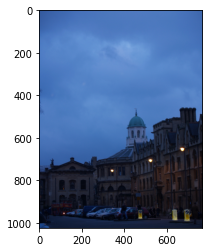

In [ ]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

In [ ]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
print(len(similar_idx))

5063


In [ ]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
print(sorted(idx_closest))

[1056, 2228, 4197, 4347, 4799]


In [ ]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)


In [ ]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image


Text(0.5, 1.0, 'result images')

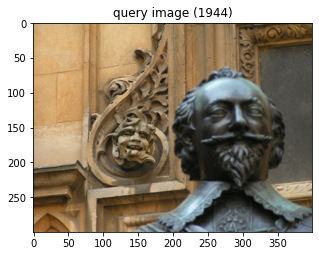

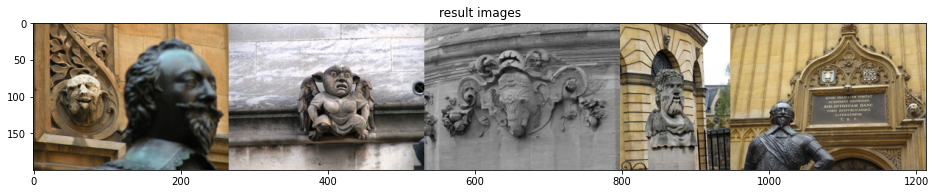

In [ ]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Text(0.5, 1.0, 'result images')

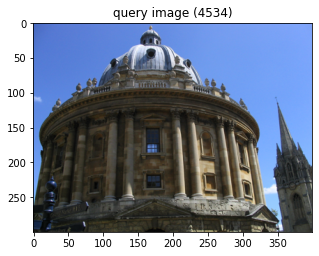

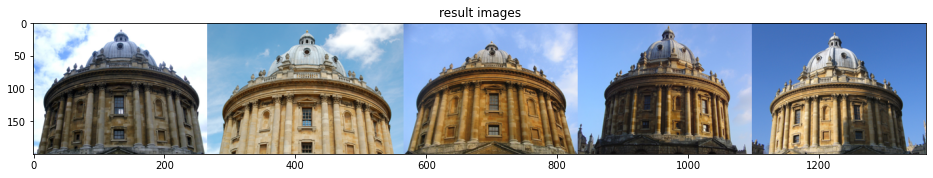

In [ ]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")